# 3.Interpolação

A interpolação é um método que permite construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos.

Exemplo: 

É comum nas ciências obtermos a partir de uma amostragem ou de um experimento dados pontuais que não possuem continuidade. E através da interpolação, pode-se construir uma função que aproximadamente se "encaixe" nestes dados pontuais, conferindo-lhes, então, a continuidade desejada.

link: https://pt.wikipedia.org/wiki/Interpola%C3%A7%C3%A3o

Tópicos:

    3.1  Interpolação linear

    3.2 Interpolação polinomial


In [2]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
plt.rcParams.update({'font.size': 20})

### 3.1  Interpolação linear

A interpolação linear consiste de uma linha reta conectando cada par de pontos consecutivos.

Dado um conjunto de pontos conhecidos $(x_{i},y_{i})$, o interpolante linear é a linha reta que conecta esses pontos. A ideia é ir conectando ponto a ponto, então para conectar o primeiro, usamos  $y_i = a x_i + b$, para o ponto seguinte usamos $y_{i+1} = a x_{i+1} + b$ e assim por diante. Então montando um sistema com essas duas equações, temos que


$\begin{cases}
y_i = a x_i + b \\
y_{i+1} = a x_{i+1} + b 
\end{cases} \Rightarrow  a = \frac{y_{i+1}-y_i}{x_{i+1}-x_i};  b = \frac{y_i x_{i+1}-y_{i+1}x_i}{x_{i+1}-x_i}
$


#### Implementando o próprio código

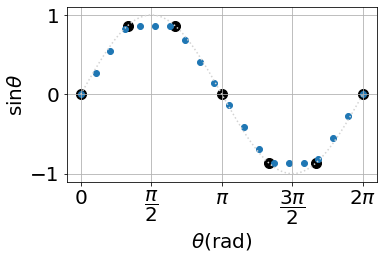

In [3]:
# Exemplo de aplicação para função seno
# Sabendo 7 pontos da função seno, como fica o grafico da intepolação?


def linear_interp(x, y, pts):
    xs = np.linspace(x[0], x[-1], pts) # ultimo valor do eixo x - primeiro valor de x
    ys = np.zeros(len(xs))
    
    for i in range(len(x)-1):  
        a = (y[i+1]-y[i])/(x[i+1]-x[i])
        b = (y[i]*x[i+1]-y[i+1]*x[i])/(x[i+1]-x[i])
        ind = np.argwhere((xs > x[i]) & (xs <= x[i+1]))[:,0]  # np.argwhere retorna os indices que satisfazem a condição dentro dele
        ys[ind] = a*xs[ind] + b
    return xs, ys


# 7 pontos conhecidos
x = np.linspace(0, 2*np.pi, 7)
y = np.sin(x)

# fazendo a interpolação com 20 pts
xi, yi = linear_interp(x, y, 20)

# função seno original - 'teste para cofirmar'
xe = np.linspace(0, 2*np.pi, 100)
ye = np.sin(xe)


# grafico
plt.plot(xe, ye, ls=':', c='lightgray')
plt.scatter(x, y, c='black', s=100)
plt.scatter(xi, yi, c='C0')
plt.xlabel(R'$\theta$(rad)')
plt.ylabel(R'$\sin\theta$')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", R"$\dfrac{\pi}{2}$", R"$\pi$", R"$\dfrac{3\pi}{2}$", R"$2\pi$"])
plt.grid()
plt.tight_layout()
plt.show()

#### Usando biblioteca do SciPy

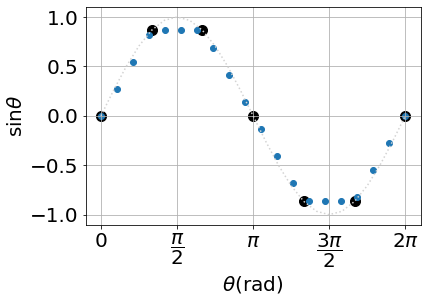

In [4]:
#exato
xe = np.linspace(0, 2*np.pi, 25)
ye = np.sin(xe)

# define a função de interpolação linear
f1 = interp1d(x, y, kind='linear')       

# calcula nos pontos intermediários
x2 = np.linspace(0, 2*np.pi, 20)
y2 = f1(x2)

# plota resultados comparando com o que tinhamos antes
plt.plot(xe, ye, ls=':', c='lightgray')
plt.scatter(x, y, c='black', s=100)
plt.scatter(x2, y2, c='C0')
plt.xlabel(R'$\theta$(rad)')
plt.ylabel(R'$\sin\theta$')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", R"$\dfrac{\pi}{2}$", R"$\pi$", R"$\dfrac{3\pi}{2}$", R"$2\pi$"])
plt.grid()
plt.show()

### 3.2 Interpolação polinomial

Na interpolação polinomial ao inves de supor uma linha reta, supomos uma parabola conectando cada par de pontos.


Dado um conjunto de $(N+1)$ pontos $(x_{i},y_{i})$ conhecidos, onde $i=0,1,...,N$, ou seja $N$ intervalos. Para cada trecho temos $y = a_i x² + b_i x + c_i$, com   $x_i \leq x \leq x_{i+1}$.


Como temos $3$ incógnitas então precisamos de $3$ equações.

Condições do intervalo $x_i \leq x \leq x_{i+1}$:

   1. Para $x=x_i  \Rightarrow  y_i = a x_i² + b x_i + c $ 

      e para $x=x_{i+1}  \Rightarrow  y_{i+1} = a x²_{i+1} + b x_{i+1} + c  $ 

   2. Continuidade da função:
      
      A derivada da função nos pontos $x_{i}$ e $ x_{i+1}$ internos $(i=1,...,N-1)$ tem que ser iguais. Assim $ 2 a_i x_{i+1} + b_i= 2 a_{i+1} x_{i+1} + b_{i+1}$
   
   3. Falta uma equação!! 
   
       Para resolver isso podemos usar a aproximação de que no primeiro intervalo $a_0=0$

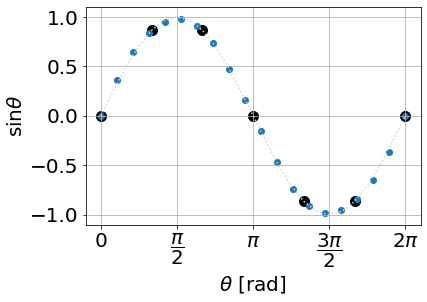

In [5]:
xe = np.linspace(0, 2*np.pi, 25)
ye = np.sin(xe)

# define a função de interpolação quadratica
f1 = interp1d(x, y, kind='quadratic')

# calcula nos pontos intermediários
x2 = np.linspace(0, 2*np.pi, 20)
y2 = f1(x2)

# plota resultados comparando com o que tinhamos antes
plt.plot(xe, ye, ls=':', c='lightgray')
plt.scatter(x, y, c='black', s=100)
plt.scatter(x2, y2, c='C0')
plt.xlabel(R'$\theta$ [rad]')
plt.ylabel(R'$\sin\theta$')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", R"$\dfrac{\pi}{2}$", R"$\pi$", R"$\dfrac{3\pi}{2}$", R"$2\pi$"])
plt.grid()
plt.show()